In [23]:
# select a random value from the column  & fill them   : you can apply them on both numerical & categorical value

## Random Value Imputation (Key Points)

1. **Preserves Variance**
   - Missing values are replaced using existing values from the same feature.
   - Since real observations are reused, the overall variance of the variable is largely preserved.

2. **Memory Heavy for Deployment**
   - Requires storing the original training data.
   - New incoming observations need access to this data to sample replacement values.

3. **Well Suited for Linear Models**
   - Maintains the original data distribution.
   - Works well regardless of the percentage of missing values.

4. **Not Ideal for Decision Trees**
   - Randomness can confuse split logic.
   - Tree-based models perform better with explicit missing categories or indicators.

5. **Not Available in Scikit-learn**
   - No built-in transformer for random sample imputation.
   - Must be implemented manually or via custom transformers.

6. **Covariance Slightly Changes**
   - Relationships with other variables may be altered.
   - However, changes are usually smaller compared to mean/median imputation.


In [24]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived']) # titanic data

In [26]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [27]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [28]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [29]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [31]:
X_train.sample(8)

,Age,Fare
528,39.0,7.9250
87,NaN,8.0500
47,NaN,7.7500
631,51.0,7.0542
648,NaN,7.5500
596,NaN,33.0000
661,40.0,7.2250
200,28.0,9.5000


In [32]:
X_train['Age Imputed'] = X_train['Age']
X_test['Age Imputed'] = X_test['Age']

In [33]:
X_train.tail()

,Age,Fare,Age Imputed
106,21.0,7.6500,21.0
270,NaN,31.0000,NaN
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0
102,21.0,77.2875,21.0


In [34]:


X_train['Age Imputed'][X_train['Age Imputed'].isnull()] = (
    X_train['Age']
    .dropna()
    .sample(X_train['Age'].isnull().sum())
    .values
)
X_test['Age Imputed'][X_test['Age Imputed'].isnull()] = (
    X_train['Age']
    .dropna()
    .sample(X_test['Age'].isnull().sum())
    .values
)

####  Random Sample Imputation – Implementation Explanation

The following code applies **random sample imputation** to handle missing values in the `Age Imputed` feature.  
Instead of using a fixed statistic, missing values are filled with **randomly selected real values** from the training data.

---

### Step 1: Locate Missing Values
- Rows where `Age Imputed` is `NaN` are identified.
- These rows are the targets for imputation.

---

### Step 2: Build a Sampling Pool
- All non-missing values from the original `Age` column are selected using `dropna()`.
- This ensures only valid, observed ages are used for replacement.

---

### Step 3: Randomly Sample Values
- The number of sampled values equals the number of missing observations.
- Sampling preserves the original distribution of the `Age` feature.

---

### Step 4: Impute Training Data
- Missing values in `X_train['Age Imputed']` are replaced with the sampled values.
- This maintains variance and avoids bias introduced by mean or median imputation.

---

### Step 5: Impute Test Data (No Data Leakage)
- Missing values in `X_test` are filled using samples drawn **only from the training data**.
- Prevents information leakage and ensures realistic model evaluation.

---

### Key Insight
Random sample imputation preserves the natural variability of the data while maintaining a clean and leakage-free machine learning pipeline.


In [35]:
X_train['Age'].isnull().sum()

140

In [37]:
X_train['Age Imputed'].isnull().sum()

0

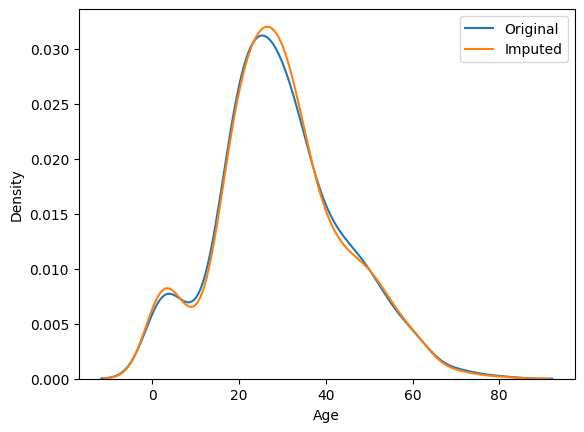

In [40]:
sns.kdeplot(X_train['Age'], label='Original')
sns.kdeplot(X_train['Age Imputed'], label='Imputed')

plt.legend()
plt.show()

In [42]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age Imputed'].var())

Original variable variance:  210.2517072477435
Variance after random imputation:  208.14482939679834


In [44]:
X_train[['Fare', 'Age', 'Age Imputed']].cov()

,Fare,Age,Age Imputed
Fare,2700.831981,71.580633,57.078269
Age,71.580633,210.251707,210.251707
Age Imputed,57.078269,210.251707,208.144829


In [45]:
# as covariance you can not handle it :  here in this technique

<Axes: >

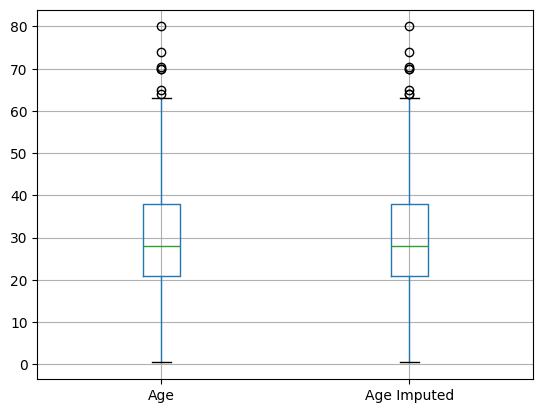

In [47]:
X_train[['Age', 'Age Imputed']].boxplot()

In [48]:
## no effect on outliers

In [56]:
for _, observation in X_test.iterrows():
    sampled_value = X_train['Age'].dropna().sample(
        1, random_state=int(observation['Fare'])
    )

# ✔ Random sample imputation
# ✔ Distribution preserved
# ✔ Reproducible in production
# ✔ No data leakage (sampling from train only)


## for categorical value 

In [61]:
df2 = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [62]:
df2.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [63]:
df2.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [64]:
X = df2
y = df2['SalePrice']

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [66]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [67]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1343,TA,Fa,177000,Fa,TA
1345,NaN,TA,108500,TA,NaN
1002,Gd,TA,232000,TA,Gd
576,Gd,TA,145000,TA,Gd
1360,NaN,TA,189000,TA,NaN


In [69]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\diwan\AppData\Local\Temp\ipykernel_9372\856878696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\diwan\AppData\Local\Temp\ipykernel_9372\856878696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\diwan\AppData\Local\Temp\ipykernel_9372\856878696.py:4: SettingWithCopyWarning: 
A value

In [70]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [71]:
temp

,original,imputed
TA,0.951043,0.948630
Fa,0.037171,0.040240
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [74]:
# on more missing data [FireplaceQu]
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.653199
TA,0.412439,0.540965
Fa,0.040917,0.051627
Po,0.027823,0.033670
Ex,0.024550,0.031425


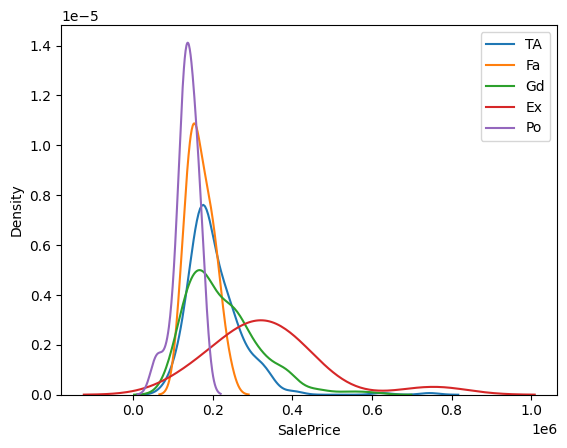

In [75]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(
        X_train.loc[X_train['FireplaceQu'] == category, 'SalePrice'],
        label=category
    )

plt.legend()
plt.show()

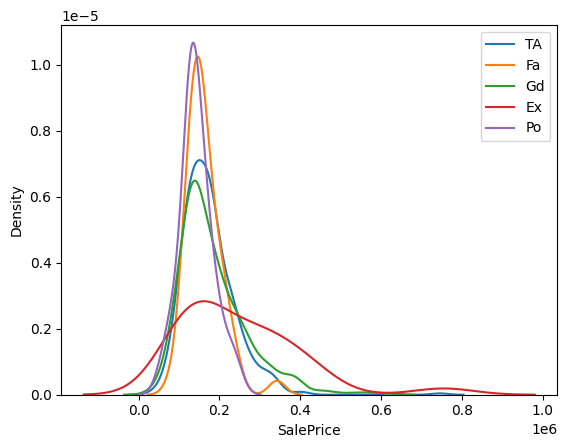

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(
        X_train.loc[X_train['FireplaceQu_imputed'] == category, 'SalePrice'],
        label=category
    )

plt.legend()
plt.show()


In [78]:
# Random sample imputation can be used even when a large percentage of data is missing,
# provided the dataset is small to medium in size and the feature distribution is stable.